# Algoritmo K-means agrupamiento de clientes

Iniciamos importando las librerías que necesitaremos para hacer este lab.

In [95]:
import numpy as np  # Librería por excelencia para análisis numérico
import pandas as pd # Librería para manejar dataframes 
from matplotlib import pyplot as plt # Librería de graficación
from sklearn.datasets.samples_generator import make_blobs # Es un generador de datasets
# para pruebas 
from sklearn.cluster import KMeans # algoritmo Kmeans pre-implementado

Procedemos entonces a generar un dataset de 600 puntos con 5 centroides, con una desviación estardar de cada centroide dada de 0.6

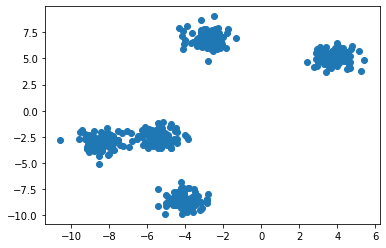

In [98]:
X, Y = make_blobs(n_samples=500, centers=5, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1])

en la variable Y están codificadas las asignaciones de cada dato a cada uno de los clusters.  

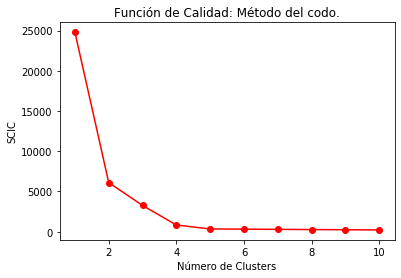

In [101]:
scic = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    scic.append(kmeans.inertia_)
plt.plot(range(1, 11), scic, 'ro-')
#plt.yscale('log')
plt.title('Función de Calidad: Método del codo.')
plt.xlabel('Número de Clusters')
plt.ylabel('SCIC')
plt.show()

Note que el descenso mínimo ocurrío cerca de 5, de manera que es el candidato que ofrece este método para el número de cluster mas significativo. 

Procedemos ahora a identificar los centroides de cada cluster:

In [102]:
n_clusters=5

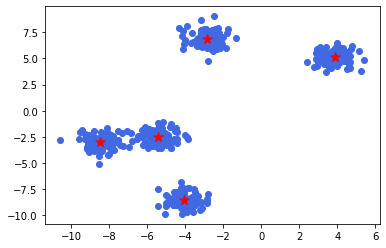

In [103]:
kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], color='royalblue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*',s=100, c='red')
plt.show()

Las etiquetas a las que pertenece cada dato fueron predichas por el algoritmo k-means y almacenadas en la variable pred_y. En este punto, y con fines estéticos, podemos separar cada cluster para graficarlo en colores diferentes.

In [104]:
DF=[]
for i in range(n_clusters):
    DF.append([])

for i in range(len(X)):
    DF[pred_y[i]].append((X[i][0],X[i][1]))

for i in range(n_clusters):
    DF[i]=np.array(DF[i])

De esta forma tenemos cada grupo en una lista separada. Podemos crear un diccionario de colores para elegir el color de cada grupo, o bien utilizar la lista de colores que ofrece matplotlib por defecto. Elegiremos en este caso la segunda opción.

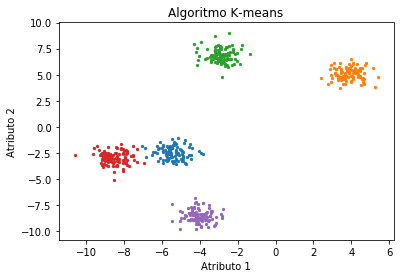

In [105]:
plt.figure()
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
for i in range(n_clusters):
    plt.scatter(DF[i][:,0],DF[i][:,1],s=5)
plt.title('Algoritmo K-means')
plt.show()